In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('sales_data.csv')
df = df[['date', 'sales']].dropna()
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
daily_df = df.resample('D').mean()
d_df = daily_df.reset_index().dropna()

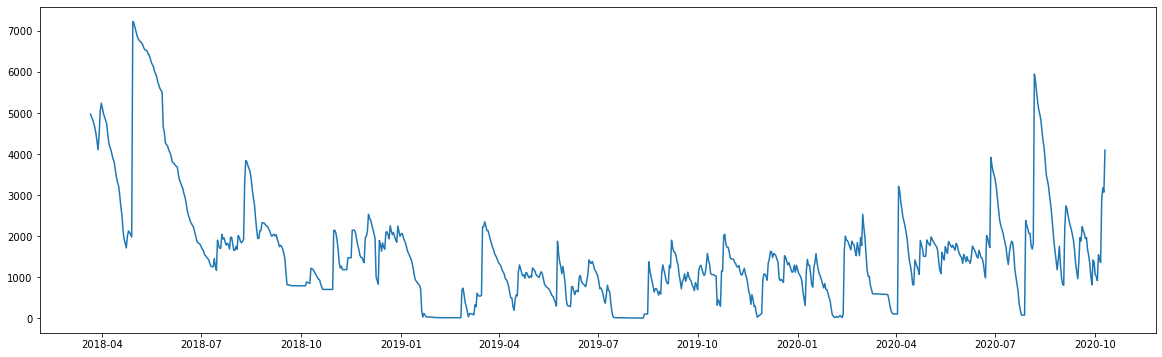

In [3]:
d_df.columns = ['ds', 'y']
fig = plt.figure(facecolor='w', figsize=(20, 6))
plt.plot(d_df.ds, d_df.y)

In [4]:
m = Prophet()
m.fit(d_df)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1020,2021-01-04,3277.932671,2281.381575,4239.536288
1021,2021-01-05,3266.035963,2264.304806,4218.220886
1022,2021-01-06,3290.323642,2311.234220,4326.451174
1023,2021-01-07,3311.536629,2318.026801,4294.181575
1024,2021-01-08,3316.978560,2364.052475,4342.428724


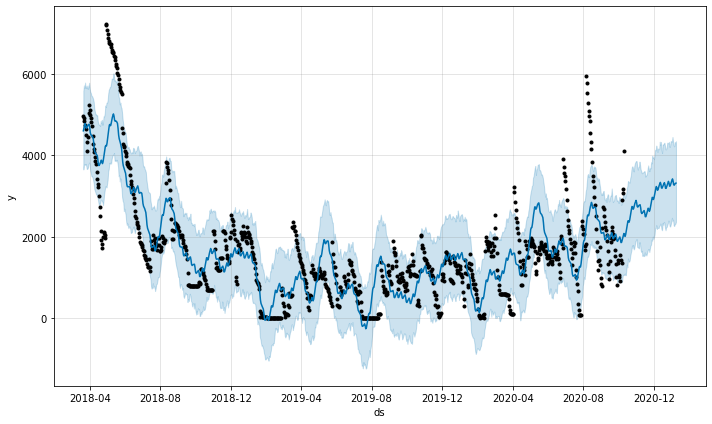

In [6]:
from datetime import datetime, timedelta
fig1 = m.plot(forecast)#datenow = datetime.now()
# datenow = datetime(2020, 9, 23)
# dateend = datenow + timedelta(days=90)
# datestart = dateend - timedelta(days=450)
# plt.xlim([datestart, dateend])
# plt.title("Iron/steel forecast", fontsize=20)
# plt.xlabel("Day", fontsize=20)
# plt.ylabel("Iron/steel price", fontsize=20)
# plt.axvline(datenow, color="k", linestyle=":")
plt.show()

In [7]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-90:]

,ds,yhat,yhat_lower,yhat_upper
935,2020-10-11,2063.001057,1060.557981,3045.025454
936,2020-10-12,2010.114933,1100.175013,2945.082573
937,2020-10-13,2047.915753,1056.140222,3009.578101
938,2020-10-14,2131.296276,1141.529462,3048.050095
939,2020-10-15,2220.885003,1313.836361,3193.180200
...,...,...,...,...
1020,2021-01-04,3277.932671,2281.381575,4239.536288
1021,2021-01-05,3266.035963,2264.304806,4218.220886
1022,2021-01-06,3290.323642,2311.234220,4326.451174
1023,2021-01-07,3311.536629,2318.026801,4294.181575


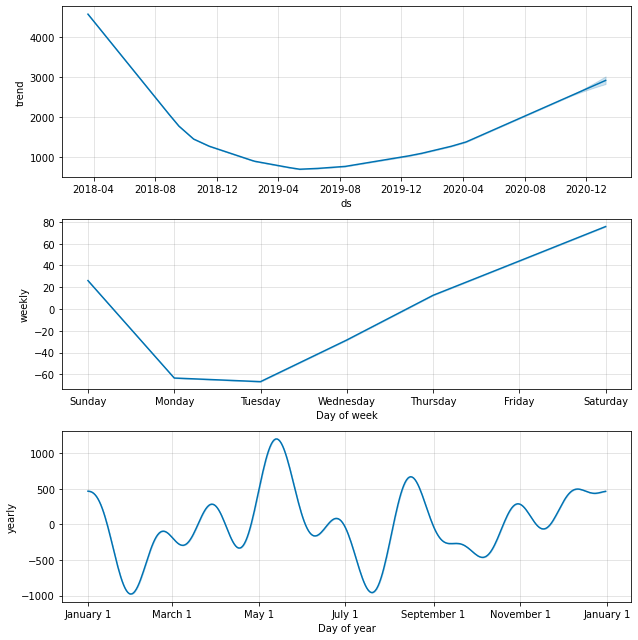

In [8]:
fig2 = m.plot_components(forecast)

In [9]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon='90 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 11 forecasts with cutoffs between 2019-04-19 00:00:00 and 2020-07-12 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,430494.831333,656.121049,523.004778,2.559290,0.409588,0.717172
1,10 days,481257.702326,693.727398,558.214001,2.450420,0.480401,0.676768
2,11 days,528526.661998,726.998392,586.031881,2.381741,0.495126,0.656566
3,12 days,585468.388075,765.159061,614.066672,2.276930,0.553413,0.646465
4,13 days,626304.687360,791.394142,630.614861,2.153433,0.553413,0.656566


In [11]:
import pickle
with open('forecast_model.pckl', 'wb') as fout:
    pickle.dump(m, fout)
with open('forecast_model.pckl', 'rb') as fin:
    m2 = pickle.load(fin)